# Work with multiple samples (and coordinate systems)

In [1]:
%load_ext autoreload
%autoreload 2

Load libraries and create an empty spatialdata object that is backed by a zarr store.

In [2]:
import os

import tempfile
import uuid

from spatialdata import SpatialData

import sparrow as sp

sdata = SpatialData()

default_tmp_path = tempfile.gettempdir()

zarr_path = os.path.join(default_tmp_path, f"sdata_{uuid.uuid4()}.zarr")

sdata.write(zarr_path)

/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]
2025-12-17 12:25:01,168 - sparrow.plot._qc_cells - WARNING - 'joypy' not installed, to use 'sparrow.pl.ridgeplot_channel' and

INFO     The Zarr backing store has been changed from None the new file path:                                      
         /tmp/nix-shell.wcNPOY/sdata_078cd907-d199-4e81-b457-57d2d7fc8a8c.zarr                                     


Add image layers.

In [3]:
from dask_image import imread
from spatialdata.transformations import Identity

from sparrow.datasets.registry import get_registry

registry = get_registry()
arr_a1_1 = imread.imread(registry.fetch("transcriptomics/resolve/mouse/20272_slide1_A1-1_DAPI.tiff"))
arr_a1_2 = imread.imread(registry.fetch("transcriptomics/resolve/mouse/20272_slide1_A1-2_DAPI.tiff"))

sdata = sp.im.add_image_layer(
    sdata,
    arr=arr_a1_1,
    output_layer="image_a1_1",
    transformations={"a1_1": Identity()},
    overwrite=True,
)

sdata = sp.im.add_image_layer(
    sdata,
    arr=arr_a1_2,
    output_layer="image_a1_2",
    transformations={"a1_2": Identity()},
    overwrite=True,
)

2025-12-17 12:25:13,797 - sparrow.image._manager - INFO - Writing results to layer 'image_a1_1'
version mismatch: detected: RasterFormatV02, requested: FormatV04
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
2025-12-17 12:25:14,375 - sparrow.image._manager - INFO - Writing results to layer 'image_a1_2'
version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04


Specify coordinate system when plotting

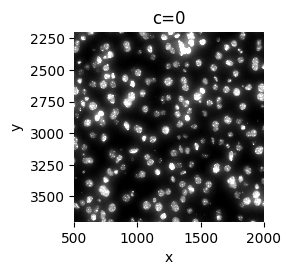

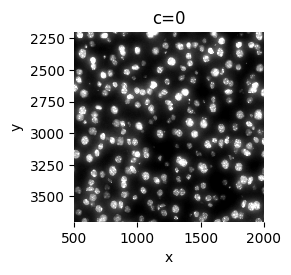

In [4]:
sp.pl.plot_image(
    sdata, img_layer="image_a1_1", to_coordinate_system="a1_1", crd=[500, 2000, 2200, 3700], figsize=(3, 3)
)
sp.pl.plot_image(
    sdata, img_layer="image_a1_2", to_coordinate_system="a1_2", crd=[500, 2000, 2200, 3700], figsize=(3, 3)
)

Do some image processing on full image, no need to specify a coordinate system

In [5]:
sdata = sp.im.min_max_filtering(
    sdata, img_layer="image_a1_1", output_layer="image_a1_1_min_max", size_min_max_filter=40, overwrite=True
)

2025-12-17 12:25:15,736 - sparrow.image._map - INFO - 'combine_z' is False, but not all 'z-slices' spefified in 'fn_kwargs'/'func' ({'size_min_max_filter': 40}/<function min_max_filtering.<locals>._apply_min_max_filter at 0x7ffe0aefe4d0>). Specifying z-slices ([0]).
2025-12-17 12:25:15,736 - sparrow.image._map - INFO - 'combine_c' is False, but not all channels spefified in 'fn_kwargs'/'func' ({0: {'size_min_max_filter': 40}}/{0: <function min_max_filtering.<locals>._apply_min_max_filter at 0x7ffe0aefe4d0>}). Specifying channels ([0]).
2025-12-17 12:25:15,738 - sparrow.image._filters - WARNING - Provided value for min max filter size is even ('40'). To prevent unexpected output, we set min max filter to '41'.
2025-12-17 12:25:15,755 - sparrow.image._manager - INFO - Writing results to layer 'image_a1_1_min_max'
version mismatch: detected: RasterFormatV02, requested: FormatV04
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ig

When doing some image processing on a crop, you need to specify the coordinate system to which the crop is defined

In [6]:
sdata = sp.im.min_max_filtering(
    sdata,
    img_layer="image_a1_1",
    output_layer="image_a1_1_min_max",
    size_min_max_filter=40,
    crd=[500, 2000, 2200, 3700],
    to_coordinate_system="a1_1",
    overwrite=True,
)
sdata = sp.im.min_max_filtering(
    sdata,
    img_layer="image_a1_2",
    output_layer="image_a1_2_min_max",
    size_min_max_filter=40,
    crd=[500, 2000, 2200, 3700],
    to_coordinate_system="a1_2",
    overwrite=True,
)

2025-12-17 12:25:20,544 - sparrow.image._map - INFO - 'combine_z' is False, but not all 'z-slices' spefified in 'fn_kwargs'/'func' ({'size_min_max_filter': 40}/<function min_max_filtering.<locals>._apply_min_max_filter at 0x7fffec29e560>). Specifying z-slices ([0]).
2025-12-17 12:25:20,544 - sparrow.image._map - INFO - 'combine_c' is False, but not all channels spefified in 'fn_kwargs'/'func' ({0: {'size_min_max_filter': 40}}/{0: <function min_max_filtering.<locals>._apply_min_max_filter at 0x7fffec29e560>}). Specifying channels ([0]).
2025-12-17 12:25:20,545 - sparrow.image._filters - WARNING - Provided value for min max filter size is even ('40'). To prevent unexpected output, we set min max filter to '41'.
2025-12-17 12:25:20,561 - sparrow.image._manager - INFO - Writing results to layer 'image_a1_1_min_max'
version mismatch: detected: RasterFormatV02, requested: FormatV04
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ig

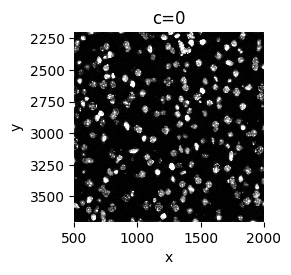

In [7]:
sp.pl.plot_image(
    sdata,
    img_layer="image_a1_1_min_max",
    to_coordinate_system="a1_1",
    figsize=(3, 3),
)

Now do segmentation

In [8]:
# no need to specify coordinate system if no crop is specifed
sdata = sp.im.segment(
    sdata,
    img_layer="image_a1_1_min_max",
    output_labels_layer="labels_a1_1",
    output_shapes_layer="shapes_a1_1",
    overwrite=True,
    crd=None,
)

# but need to specify to_coordinate_system when crop is defined

sdata = sp.im.segment(
    sdata,
    img_layer="image_a1_2_min_max",
    output_labels_layer="labels_a1_2",
    output_shapes_layer="shapes_a1_2",
    overwrite=True,
    crd=[600, 2000, 2200, 3700],
    to_coordinate_system="a1_2",
)

/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
2025-12-17 12:25:26,631 - sparrow.image.segmentation._segmentation - INFO - Linking labels across chunks.
2025-12-17 12:25:26,635 - sparrow.image._manager - INFO - Writing results to layer 'labels_a1_1'
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
2025-12-17 12:25:26,730 - sparrow.shape._manager - INFO - Finished vectorizing. Dissolving shapes at the border of the chunks. This can take a couple minutes if input mask contains a lot of chunks.
2025-12-17 12:25:26,737 - sparrow.shape._manager - INFO - Dissolve is done.
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/zarr/cr

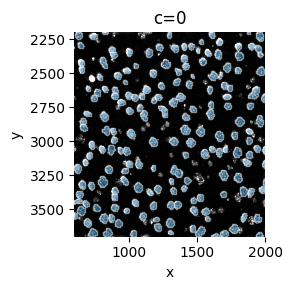

In [9]:
sp.pl.plot_shapes(
    sdata,
    img_layer="image_a1_2_min_max",
    shapes_layer="shapes_a1_2",
    to_coordinate_system="a1_2",
    crd=[600, 2000, 2200, 3700],
    figsize=(3, 3),
)

Read the transcripts downloaded previously. Currently, the transformation specified on the transcripts is always the Identity transformation. The transcripts should be registered with the coordinate system of the image layer via an affine transform matrix that can be specified via the parameter `path_transform_matrix`. If not specified, the identity matrix will be used.

In [10]:
path_points_a1_1 = registry.fetch("transcriptomics/resolve/mouse/20272_slide1_A1-1_results.txt")
path_points_a1_2 = registry.fetch("transcriptomics/resolve/mouse/20272_slide1_A1-2_results.txt")

kwargs = {
    "column_x": 0,
    "column_y": 1,
    "column_gene": 3,
    "delimiter": "\t",
    "header": None,
    "overwrite": True,
}

sdata = sp.io.read_transcripts(
    sdata, path_count_matrix=path_points_a1_1, to_coordinate_system="a1_1", output_layer="points_a1_1", **kwargs
)

sdata = sp.io.read_transcripts(
    sdata, path_count_matrix=path_points_a1_2, to_coordinate_system="a1_2", output_layer="points_a1_2", **kwargs
)

2025-12-17 12:25:37,995 - sparrow.io._transcripts - INFO - No transform matrix given, will use identity matrix.
2025-12-17 12:25:42,281 - sparrow.io._transcripts - INFO - No transform matrix given, will use identity matrix.


Verify that transformation associated to points layer is indeed the identity, and verify that shapes and labels have same transformation associated to them.

In [11]:
from spatialdata.transformations import get_transformation

print("points:\n", get_transformation(sdata["points_a1_2"], get_all=True))
print(
    "image\n", get_transformation(sdata["image_a1_2_min_max"], get_all=True)
)  # one crop was taken, so one translation is defined on image.
print(
    "labels:\n", get_transformation(sdata["labels_a1_2"], get_all=True)
)  # two times a crop was taken, so a sequence of two translations is defined on labels/shapes.
print(
    "shapes:\n", get_transformation(sdata["shapes_a1_2"], get_all=True)
)  # same transformation defined on associated shapes layer.

points:
 {'a1_2': Identity }
image
 {'a1_2': Sequence 
    Translation (c, y, x)
        [   0. 2200.  500.]
    Identity }
labels:
 {'a1_2': Sequence 
    Translation (y, x)
        [  0. 100.]
    Sequence 
        Translation (y, x)
            [2200.  500.]
        Identity }
shapes:
 {'a1_2': Sequence 
    Translation (x, y)
        [100.   0.]
    Sequence 
        Translation (x, y)
            [ 500. 2200.]
        Identity }


2025-12-17 12:25:45,626 - sparrow.plot._sanity - INFO - size before sampling is 93924
2025-12-17 12:25:45,813 - sparrow.plot._sanity - INFO - Plotting 10000 transcripts.
2025-12-17 12:25:45,815 - sparrow.plot._sanity - INFO - Selecting boundaries
2025-12-17 12:25:45,823 - sparrow.plot._sanity - INFO - Plotting boundaries
2025-12-17 12:25:45,928 - sparrow.plot._sanity - INFO - End plotting boundaries


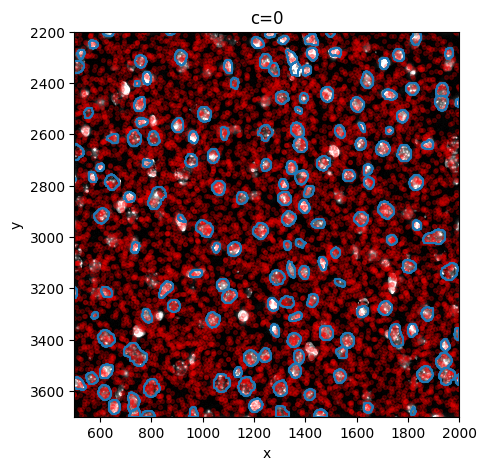

In [12]:
sp.pl.sanity(
    sdata,
    img_layer="image_a1_1_min_max",
    shapes_layer="shapes_a1_1",
    points_layer="points_a1_1",
    to_coordinate_system="a1_1",
    figsize=(5, 5),
    n_sample=10000,
)

2025-12-17 12:25:46,332 - sparrow.plot._sanity - INFO - size before sampling is 98247
2025-12-17 12:25:46,468 - sparrow.plot._sanity - INFO - Plotting 10000 transcripts.
2025-12-17 12:25:46,470 - sparrow.plot._sanity - INFO - Selecting boundaries
2025-12-17 12:25:46,478 - sparrow.plot._sanity - INFO - Plotting boundaries
2025-12-17 12:25:46,587 - sparrow.plot._sanity - INFO - End plotting boundaries


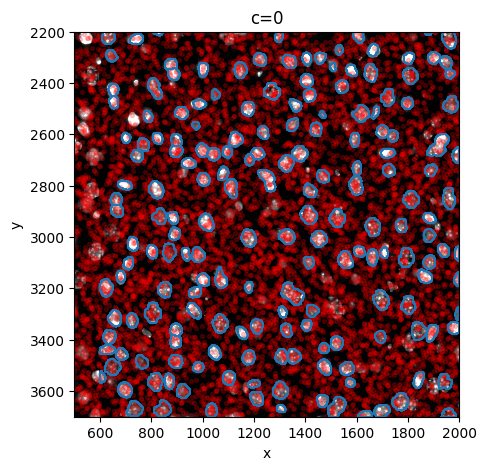

In [13]:
sp.pl.sanity(
    sdata,
    img_layer="image_a1_2_min_max",
    shapes_layer="shapes_a1_2",
    points_layer="points_a1_2",
    to_coordinate_system="a1_2",
    figsize=(5, 5),
    n_sample=10000,
)

In [14]:
sdata = sp.tb.allocate(
    sdata,
    labels_layer="labels_a1_1",
    points_layer="points_a1_1",
    to_coordinate_system="a1_1",
    output_layer="table",
    append=False,
    overwrite=True,
)

# append gene count of labels_a1_2 and points_a1_2 to anndata object with name 'table'
sdata = sp.tb.allocate(
    sdata,
    labels_layer="labels_a1_2",
    points_layer="points_a1_2",
    to_coordinate_system="a1_2",
    output_layer="table",
    append=True,
    overwrite=True,
)

2025-12-17 12:25:46,828 - sparrow.table._allocation - INFO - Calculating cell counts.
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:184: UserWarning: The table is annotating 'labels_a1_1', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
2025-12-17 12:25:47,352 - sparrow.shape._manager - WARNING - No polygons filtered out for shapes layer 'shapes_a1_1'. As a result, shapes layer 'filtered_segmentation_shapes_a1_1' will not be created. This is expected if 'indexes_to_keep' matches 'shapes_a1_1' indexes.
2025-12-17 12:25:47,360 - sparrow.table._allocation - INFO - Calculating cell counts.
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-pack

In [15]:
sdata = sp.tb.preprocess_transcriptomics(
    sdata,
    labels_layer=["labels_a1_1", "labels_a1_2"],
    table_layer="table",
    output_layer="table_preprocessed",
    overwrite=True,
)  # we can also choose to set output_layer equal to 'table'.

2025-12-17 12:25:47,927 - sparrow.table._preprocess - INFO - Calculating cell size from provided labels_layer 'labels_a1_1'
2025-12-17 12:25:47,992 - sparrow.table._preprocess - INFO - Calculating cell size from provided labels_layer 'labels_a1_2'
/home/arne/.local/share/uv/python/cpython-3.10.18-linux-x86_64-gnu/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/spatialdata/models/models.py:1144: UserWarning: Converting `region_key: fov_labels` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:184: UserWarning: The table is annotating 'labels_a1_1', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/home/arne/Repositories/napari-sparrow/.venv/lib/pyth

In [16]:
sdata = sp.tb.filter_on_size(
    sdata,
    labels_layer=["labels_a1_1", "labels_a1_2"],
    table_layer="table_preprocessed",
    output_layer="table_filtered",
    min_size=1000,
    overwrite=True,
)

/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:184: UserWarning: The table is annotating 'labels_a1_1', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:184: UserWarning: The table is annotating 'labels_a1_2', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
2025-12-17 12:25:48,825 - sparrow.shape._manager - INFO - Filtering 28 cells from shapes layer 'shapes_a1_1'. Adding new shapes layer 'filtered_size_shapes_a1_1' containing these filtered out polygons.
2025-12-17 12:25:49,028 - sparrow.utils._io - WARNING - layer with name 'shapes_a1_1' already exists. Overwriting...
2025-12-17 12:25:49,181 - sparrow.shape._manager - INFO - Filtering 16 cells from shapes layer 'shapes_a1_2'. Adding new shapes layer 'filtered_size_shapes_a1_2' containing thes

In [17]:
sdata

SpatialData object, with associated Zarr store: /tmp/nix-shell.wcNPOY/sdata_078cd907-d199-4e81-b457-57d2d7fc8a8c.zarr
├── Images
│     ├── 'image_a1_1': DataArray[cyx] (1, 12864, 10720)
│     ├── 'image_a1_1_min_max': DataArray[cyx] (1, 1500, 1500)
│     ├── 'image_a1_2': DataArray[cyx] (1, 10720, 8576)
│     └── 'image_a1_2_min_max': DataArray[cyx] (1, 1500, 1500)
├── Labels
│     ├── 'labels_a1_1': DataArray[yx] (1500, 1500)
│     └── 'labels_a1_2': DataArray[yx] (1500, 1400)
├── Points
│     ├── 'points_a1_1': DataFrame with shape: (<Delayed>, 3) (2D points)
│     └── 'points_a1_2': DataFrame with shape: (<Delayed>, 3) (2D points)
├── Shapes
│     ├── 'filtered_low_counts_shapes_a1_1': GeoDataFrame shape: (5, 1) (2D shapes)
│     ├── 'filtered_low_counts_shapes_a1_2': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── 'filtered_size_shapes_a1_1': GeoDataFrame shape: (28, 1) (2D shapes)
│     ├── 'filtered_size_shapes_a1_2': GeoDataFrame shape: (16, 1) (2D shapes)
│     ├── 'shapes_a1_

In [18]:
assert sdata["table_filtered"].shape[0] == len(sdata["shapes_a1_1"]) + len(sdata["shapes_a1_2"])

In [19]:
from sparrow.utils._keys import _REGION_KEY

for to_coordinate_system in ["a1_1", "a1_2"]:
    assert sdata["table"][sdata["table"].obs[_REGION_KEY] == f"labels_{to_coordinate_system}"].shape[0] == len(
        sdata[f"shapes_{to_coordinate_system}"]
    ) + len(sdata[f"filtered_low_counts_shapes_{to_coordinate_system}"]) + len(
        sdata[f"filtered_size_shapes_{to_coordinate_system}"]
    )

In [20]:
zarr_path = os.path.join(default_tmp_path, f"sdata_{uuid.uuid4()}.zarr")  # output path for queried sdata

labels_layer = [
    "labels_a1_1",
    "labels_a1_2",
]
crd = [
    (600, 1000, 2300, 3000),
    (700, 1000, 2300, 2500),
]
to_coordinate_system = ["a1_1", "a1_2"]

sdata_queried = sp.utils.bounding_box_query(
    sdata,
    labels_layer=labels_layer,
    crd=crd,
    to_coordinate_system=to_coordinate_system,
    copy_img_layer=False,
    copy_shapes_layer=False,
    copy_points_layer=False,
    output=zarr_path,
)

for _labels_layer in labels_layer:
    assert _labels_layer in sdata_queried.labels

INFO     The Zarr backing store has been changed from None the new file path:                                      
         /tmp/nix-shell.wcNPOY/sdata_c66bfa43-1b79-4cc6-9195-c7f37270e264.zarr                                     


2025-12-17 12:25:49,710 - sparrow.image._manager - INFO - Writing results to layer 'labels_a1_1'
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
2025-12-17 12:25:49,736 - sparrow.image._manager - INFO - Writing results to layer 'labels_a1_2'
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:184: UserWarning: The table is annotating 'labels_a1_1', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/home/arne/Repositories/napari-sparrow/.venv/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:184: 